
# Tarea: análisis exploratorio de datos






## Introducción

 En esta tarea, practicaremos el uso de análisis de datos exploratorios en los datos de movilidad comunitaria COVID-19 de Google.

 Estos datos se recopilaron de usuarios de Google Maps de todo el mundo durante los varios meses. Combina el historial de ubicación de una gran cantidad de usuarios para capturar el aumento o la disminución general del tiempo que pasan en lugares como: tiendas minoristas y recreativas, tiendas de comestibles y farmacias, parques, estaciones de tránsito, lugares de trabajo y residencias.

 Los datos muestran cómo los patrones de movilidad de los usuarios, en qué tipo de lugares pasan el tiempo, variaron en el transcurso de la pandemia de COVID-19.

 A medida que trabaje en este cuaderno, verá que algunas celdas de texto y código están marcadas con "TODO" en la parte superior. Tendrás que editar estas celdas para completar el código o responder las preguntas como se indica.

 Cuando haya terminado, asegúrese de haber ejecutado todas las celdas del cuaderno (en orden) y luego cree un PDF a partir de él.




## Más información sobre los datos

 Primero, vale la pena obtener más información sobre los datos: cómo se recopilan, qué se incluye, cómo Google obtiene el consentimiento para recopilar estos datos y cómo se protege la privacidad del usuario. Google proporciona varios recursos para conocer los datos:
-  [Entrada en el blog](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-  [Sobre estos datos](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-  [Comprender los datos](https://support.google.com/covid19-mobility/answer/9825414?hl=en&amp;ref_topic=9822927)



## Leer datos

 Ahora está listo para leer los datos en su cuaderno.

 Visite la página web de Google para el proyecto [COVID-19 Community Mobility](https://www.google.com/covid19/mobility/) para obtener la URL de los datos.

 (Las instrucciones específicas dependerán de su navegador y sistema operativo, pero en mi computadora portátil, puedo obtener la URL haciendo clic derecho en el botón que dice "Descargar CSV global" y eligiendo "Copiar dirección de enlace").

 Luego, en las siguientes celdas, use esa URL para leer los datos en un marco de datos de pandas llamado `df` . (Puede seguir el ejemplo del cuaderno "Análisis exploratorio de datos").


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO Q1
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df = pd.read_csv(url)

<ipython-input-2-d83a71b3868c>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)



Utilice las funciones `info()` y `head()` para mostrar información básica sobre los datos y ver las primeras muestras.


In [3]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

In [4]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0



## Manipulaciones básicas de datos



Los datos incluyen un campo de fecha, pero es posible que se hayan leído como una cadena, en lugar de como una `datetime` . Si ese es el caso, use `to_datetime()` para convertir el campo en un formato de fecha y hora. (Puede seguir el ejemplo del cuaderno "Análisis exploratorio de datos" de la lección de esta semana).

 Luego, use `info()` nuevamente para asegurarse de que se aplicó su cambio. Tenga en cuenta la diferencia en la salida, en relación con la celda de arriba.


In [5]:
# TODO Q4
# df['date'] = ...
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_phar


A continuación, extraerá el subconjunto de datos para el estado de EE. UU. que elija. Puede elegir cualquier ubicación *excepto* Nueva York.

 Los datos se informan para diferentes regiones, con diferentes niveles de granularidad disponibles. Esto se explica mejor con un ejemplo:

 Supongamos que quiero la tendencia general de todo EE. UU., usaría el subconjunto de datos donde `country_region` es igual a "Estados Unidos" y `sub_region_1` es nulo:

 Supongamos que quiero la tendencia general de todo el estado de Nueva York: usaría el subconjunto de datos donde `country_region` es igual a "Estados Unidos", `sub_region_1` es igual a "Nueva York" y `sub_region_2` es nulo:

 Supongamos que quiero la tendencia general de Brooklyn, Nueva York (Kings County): usaría el subconjunto de datos donde `country_region` es igual a "Estados Unidos", `sub_region_1` es igual a "Nueva York" y `sub_region_2` es igual a "Kings County". ”:

 En las siguientes celdas, complete el código para crear un marco de datos `df_subset` con datos de un solo estado de EE. UU. (pero *no de* Nueva York).


In [6]:
# TODO Q5

# Got data from the state of Texas
dfTexas = df[df["sub_region_1"] == "Texas"]
dfTexas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185210 entries, 11119546 to 11304755
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 185210 non-null  object        
 1   country_region                                      185210 non-null  object        
 2   sub_region_1                                        185210 non-null  object        
 3   sub_region_2                                        184236 non-null  object        
 4   metro_area                                          0 non-null       object        
 5   iso_3166_2_code                                     974 non-null     object        
 6   census_fips_code                                    184236 non-null  float64       
 7   place_id                                            185210 non-null  objec


¿Están completos los datos o algunos datos no están disponibles para la ubicación que ha elegido? En la siguiente celda, escriba código para comprobar si faltan datos en los campos `...percent_change_from_baseline` .

 Compruebe también si faltan filas de datos. ¿Qué intervalo de fechas se representa en estos datos? ¿Todos los días dentro de ese rango están incluidos en los datos?


In [7]:
# TODO Q6

# Get range
minDt = dfTexas.date.min()
maxDt = dfTexas.date.max()
expectedRange = pd.date_range(start = minDt, end = maxDt)

print(expectedRange)

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-15'],
              dtype='datetime64[ns]', length=974, freq='D')


In [8]:
# Nulls of retail_and_recreation_percent_change_from_baseline
dfTexas.loc[dfTexas["retail_and_recreation_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120704,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-17,NaN,NaN,NaN,NaN,NaN,3.0
11120705,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-18,NaN,NaN,NaN,NaN,NaN,4.0
11120706,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-19,NaN,NaN,NaN,NaN,NaN,4.0
11120707,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-20,NaN,NaN,NaN,NaN,NaN,4.0
11120708,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-21,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304751,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-10,NaN,NaN,NaN,NaN,-34.0,NaN
11304752,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-11,NaN,NaN,NaN,NaN,-22.0,NaN
11304753,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-12,NaN,NaN,NaN,NaN,-21.0,NaN
11304754,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [9]:
# Nulls of grocery_and_pharmacy_percent_change_from_baseline
dfTexas.loc[dfTexas["grocery_and_pharmacy_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120704,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-17,NaN,NaN,NaN,NaN,NaN,3.0
11120705,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-18,NaN,NaN,NaN,NaN,NaN,4.0
11120706,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-19,NaN,NaN,NaN,NaN,NaN,4.0
11120707,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-20,NaN,NaN,NaN,NaN,NaN,4.0
11120708,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-21,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304751,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-10,NaN,NaN,NaN,NaN,-34.0,NaN
11304752,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-11,NaN,NaN,NaN,NaN,-22.0,NaN
11304753,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-12,NaN,NaN,NaN,NaN,-21.0,NaN
11304754,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [10]:
# Nulls of parks_percent_change_from_baseline
dfTexas.loc[dfTexas["parks_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120520,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
11120521,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
11120522,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0
11120523,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0
11120524,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304751,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-10,NaN,NaN,NaN,NaN,-34.0,NaN
11304752,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-11,NaN,NaN,NaN,NaN,-22.0,NaN
11304753,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-12,NaN,NaN,NaN,NaN,-21.0,NaN
11304754,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [11]:
# Nulls of transit_stations_percent_change_from_baseline
dfTexas.loc[dfTexas["transit_stations_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120520,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
11120521,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
11120522,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0
11120523,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0
11120524,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304751,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-10,NaN,NaN,NaN,NaN,-34.0,NaN
11304752,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-11,NaN,NaN,NaN,NaN,-22.0,NaN
11304753,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-12,NaN,NaN,NaN,NaN,-21.0,NaN
11304754,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [12]:
# Nulls of workplaces_percent_change_from_baseline
dfTexas.loc[dfTexas["workplaces_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120704,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-17,NaN,NaN,NaN,NaN,NaN,3.0
11120705,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-18,NaN,NaN,NaN,NaN,NaN,4.0
11120706,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-19,NaN,NaN,NaN,NaN,NaN,4.0
11120707,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-20,NaN,NaN,NaN,NaN,NaN,4.0
11120708,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-08-21,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304099,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2020-03-22,-58.0,-14.0,NaN,NaN,NaN,NaN
11304105,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2020-03-28,-44.0,0.0,NaN,NaN,NaN,NaN
11304106,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2020-03-29,-49.0,-25.0,NaN,NaN,NaN,NaN
11304112,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2020-04-04,-60.0,-16.0,NaN,NaN,NaN,NaN


In [13]:
# Nulls of residential_percent_change_from_baseline
dfTexas.loc[dfTexas["residential_percent_change_from_baseline"].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11120520,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
11120521,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
11120527,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-22,1.0,1.0,NaN,NaN,1.0,NaN
11120528,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-23,-4.0,3.0,NaN,NaN,1.0,NaN
11120534,US,United States,Texas,Anderson County,NaN,NaN,48001.0,ChIJEVmjAz5nSIYRZwt99yWrrhM,2020-02-29,11.0,16.0,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304751,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-10,NaN,NaN,NaN,NaN,-34.0,NaN
11304752,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-11,NaN,NaN,NaN,NaN,-22.0,NaN
11304753,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-12,NaN,NaN,NaN,NaN,-21.0,NaN
11304754,US,United States,Texas,Zavala County,NaN,NaN,48507.0,ChIJDfdIP7BPXoYRlIc-mrJMufY,2022-10-13,NaN,NaN,NaN,NaN,-24.0,NaN


In [14]:
# Sum of null columns for every row
dfTexas.isnull().sum()

country_region_code                                        0
country_region                                             0
sub_region_1                                               0
sub_region_2                                             974
metro_area                                            185210
iso_3166_2_code                                       184236
census_fips_code                                         974
place_id                                                   0
date                                                       0
retail_and_recreation_percent_change_from_baseline     71874
grocery_and_pharmacy_percent_change_from_baseline      85642
parks_percent_change_from_baseline                    138711
transit_stations_percent_change_from_baseline          99170
workplaces_percent_change_from_baseline                11311
residential_percent_change_from_baseline               89860
dtype: int64

In [15]:
# Get expected range
minDt = dfTexas.date.min()
maxDt = dfTexas.date.max()
expectedRange = pd.date_range(start = minDt, end = maxDt)

# Check for days with no info (missing days in data)
missingHours = expectedRange.difference(dfTexas['date'])
print(missingHours) # Empty


DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [16]:
# 'expectedRange.isin(dfTexas['date'])' creates a boolean serie that checks for every date in 'expectedRange' to be in the 'date' column.
# 'all()' checks if all elements are 'True', which means that every date is in the data frame

allDaysIncluded = expectedRange.isin(dfTexas['date']).all()
print(allDaysIncluded)

True


There are no missing days in the info for this state! 🙂

In [17]:
# Count the rows for every date.
dfTexas['date'].value_counts()

2020-04-03    215
2020-03-27    214
2020-04-02    214
2020-03-20    213
2020-03-23    213
             ... 
2020-08-29     52
2020-08-23     51
2020-08-30     51
2020-09-06     51
2020-09-05     51
Name: date, Length: 974, dtype: int64


**TODO** P7: Edite esta celda para responder a la siguiente pregunta: ¿Están completos los datos o faltan algunos datos relevantes? ¿Por qué algunas ubicaciones solo tienen datos parciales disponibles (faltan algunos campos `...percent_change_from_baseline` para algunas fechas)? (Incluso si, para el estado de EE. UU. que ha elegido, los datos están completos, explique por qué pueden faltar algunos datos para otras regiones).

 **Incluya una breve cita del material que leyó en la sección "Aprender sobre los datos" para responder a esta pregunta. Indique que es una cita entre comillas o una cita en bloque, y cite la fuente, incluida una URL.**


 **Respuesta**

> Tras analizar la información, es notable la falta de datos en muchas de las filas, en columnas como los de nombre `sub_region_#` o los campos `...percent_change_from_baseline`. La ausencia de datos puede deberse a varios factores, como la disponibilidad limitada de datos para ciertas ubicaciones o la falta de informes de cambios en el comportamiento en esos lugares. Considerando la naturaleza de la información recopilada, donde se deben obtener datos detallados de, literalmente, partes de todo el mundo, se asume como muy compleja la etapa de recolección de información. En el [cuaderno](https://colab.research.google.com/drive/1qAZWhrZ_W4Prj9DltpZOzVuIWNGoUMFy?usp=sharing) de aprendizaje de esta información, se menciona:
"Es difícil tener expectativas razonables sobre los valores de los datos, si no se entiende el tema con el que se relacionan los datos". Al comprender, como ya se mencionó, la gran dimensión con la que se recolectaron estos datos, además de la precisión que requieren, es consecuente tener una expectativa que tienda a la falta de alguna de la información. Sin embargo, me gustaría resaltar, cómo muchas de las columnas carecen de fallas; quiero dar a entender que existe mucha información determinante en todas las filas.



Para rastrear tendencias en casos y vacunas junto con tendencias de movilidad, también podemos leer datos de varias otras fuentes. Por ejemplo,
-  Our World in Data distribuye datos sobre el estado de vacunación de COVID-19 a lo largo del tiempo para los estados de EE. UU. en su [repositorio de Github](https://github.com/owid/covid-19-data) .
-  The New York Times distribuye datos sobre los casos acumulados de COVID-19 a lo largo del tiempo para los estados de EE. UU. en su [repositorio de Github](https://github.com/nytimes/covid-19-data) .

 Puede elegir si desea ver las tendencias de vacunación o las tendencias de casos para el estado de EE. UU. que ha seleccionado. Utilice una de las siguientes celdas para leer los datos, convierta el campo `date` en una `datetime` y obtenga el subconjunto de datos que se aplica al estado específico de EE. UU. para el que está explorando los datos de movilidad.

 Luego, use las funciones `pandas` para verificar su nuevo marco de datos y observe las primeras filas de datos.


In [18]:
# TODO Q8 - Vaccinations option

# Parse CSV
urlVax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
dfVax = pd.read_csv(urlVax)

# Date to datetime
dfVax["date"] = pd.to_datetime(dfVax["date"])

#Obtain subset for Texas
dfVaxTexas = dfVax[dfVax["location"] == "Texas"]

# Check the data frame and look at a few rows
#dfVaxTexas.info()
dfVaxTexas.sample(15)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
45751,2022-05-12,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10687.0,369.0,NaN,NaN,NaN
45678,2022-02-28,Texas,44402896.0,58872095.0,20604388.0,60.07,153.14,17419275.0,71.06,203.04,NaN,37114.0,1280.0,0.754,7717248.0,26.61
45461,2021-07-26,Texas,27066624.0,32896995.0,14733626.0,43.43,93.35,12593905.0,50.81,113.45,52301.0,62040.0,2140.0,0.823,NaN,NaN
45826,2022-07-26,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10687.0,369.0,NaN,NaN,NaN
45753,2022-05-14,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10687.0,369.0,NaN,NaN,NaN
45452,2021-07-17,Texas,26551336.0,32505445.0,14395623.0,42.73,91.57,12390950.0,49.65,112.10,56443.0,50764.0,1751.0,0.817,NaN,NaN
46091,2023-04-17,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7047.0,243.0,NaN,NaN,NaN
46096,2023-04-22,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6282.0,217.0,NaN,NaN,NaN
45295,2021-02-10,Texas,3568618.0,5010525.0,2672352.0,3.08,12.31,893767.0,9.22,17.28,132438.0,130817.0,4512.0,0.712,NaN,NaN
46062,2023-03-19,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6079.0,210.0,NaN,NaN,NaN



## Visualizar datos

 Finalmente, vamos a visualizar los cambios en la movilidad humana durante este tiempo, para la ubicación que haya elegido, junto con las tendencias de vacunación o las tendencias de casos.

 En la siguiente celda, cree una figura con siete subtramas, dispuestas verticalmente. (Puede consultar el ejemplo en el cuaderno "Python + numpy" de la lección de esta semana). En el eje horizontal, coloque la fecha. En los ejes verticales, muestre (como una línea):
-  `retail_and_recreation_percent_change_from_baseline` en la subparcela superior
-  `grocery_and_pharmacy_percent_change_from_baseline` en la siguiente subtrama
-  `parks_percent_change_from_baseline` en la siguiente subtrama
-  `transit_stations_percent_change_from_baseline` en la siguiente subtrama
-  `workplaces_percent_change_from_baseline` en la siguiente subtrama
-  `residential_percent_change_from_baseline` en la siguiente subparcela
-  ya sea casos de COVID-19 o vacunas en la subparcela inferior

 Asegúrese de etiquetar claramente cada eje. ¡Use la documentación de la biblioteca `matplotlib` para ajustar sus cifras y hacer que su gráfico se vea bien!


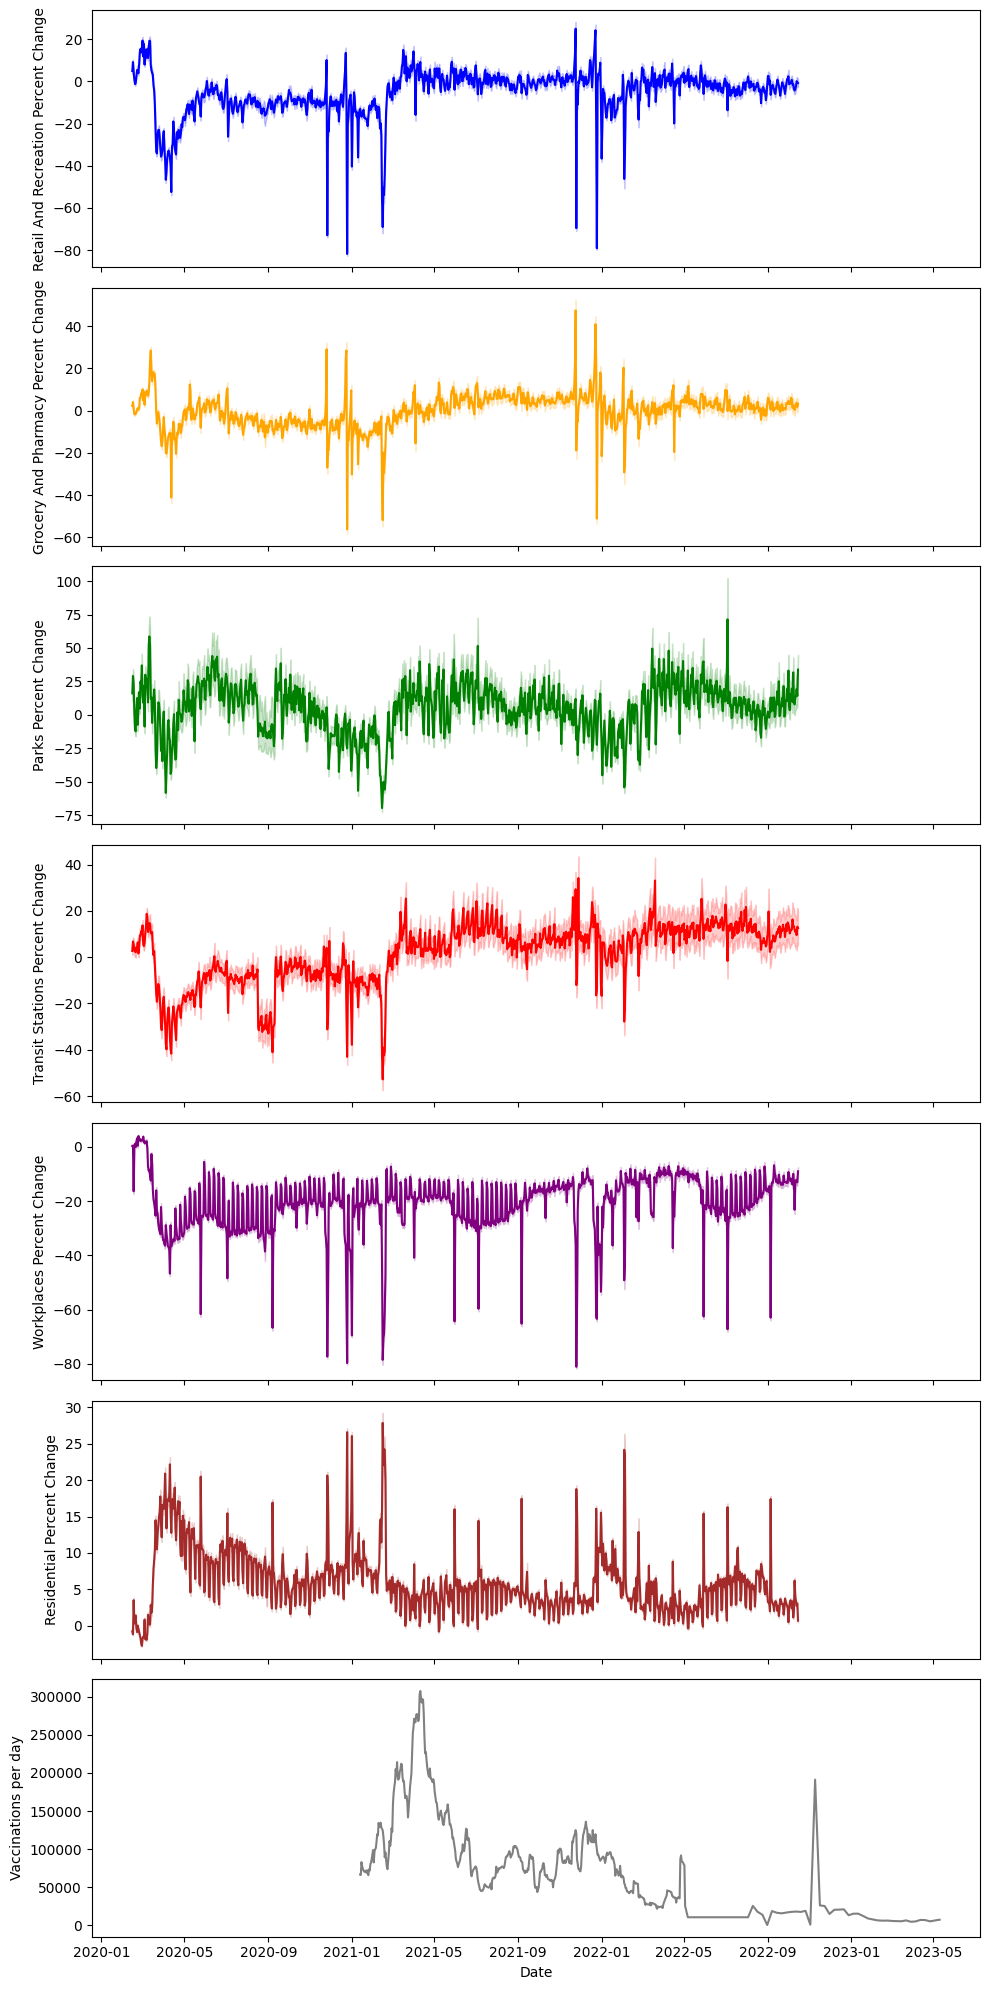

In [19]:
# TODO Q9
# create visualization

# Figure and axes
fig, axs = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

# Column names
metrics = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
]

# Different color for every graph
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray']

# Draw graph for each metric from the 'dfTexas' DataFrame
for i, metric in enumerate(metrics):
    sns.lineplot(x='date', y=metric, data=dfTexas, ax=axs[i], color=colors[i])
    axs[i].set_ylabel(metric.replace('_', ' ').title()[:-14])
    axs[i].set_xlabel('Date')

# Draw last graph for vaccinations per day in Texas from the dfVaxTexas
sns.lineplot(x='date', y='daily_vaccinations', data=dfVaxTexas, ax=axs[-1], color=colors[-1])
axs[-1].set_ylabel('Vaccinations per day')
axs[-1].set_xlabel('Date')

plt.tight_layout() # Space between graphs
plt.show()


**Actividad**: Responda las siguientes preguntas:
-  ¿Los resultados parecen satisfacer el “sentido común”? Asegúrese de explicar cualquier tendencia, patrón o anomalía notable observada en sus datos de movilidad.
> Parece que sí. Lo digo porque en casi todos los campos parecía haber la misma tendencia: Al principio tuvieron una fuerte bajada pero después se mantuvieron casi constantes, con altos y bajos no tan significativos, pero sobretodo, con todos compartiendo la misma tendencia. El único campo diferente al de los demás es el residencial, que aumenta en gran medida al principio, como se puede suponer debido a la situación.
-  ¿Qué tendencias, patrones o anomalías notables en los datos de movilidad probablemente estén relacionadas con los casos de COVID-19, las intervenciones no farmacéuticas, como las órdenes de quedarse en casa o las vacunas?
> Al ver esta pregunta, me llamó mucho la atención los comportamientos de los datos sobre los cambios en estaciones de trenes y parques. Se puede ver cómo cercano tiempo después al inicio de la recolección de los datos hay una bajada significativa, indicando que el flujo de personas en esos lugares, en ese tiempo específico, fue muy bajo en comparación a lo "normal". También es interesante ver cómo el gráfico de estaciones de trabajo tuvo grandes picos caídas; en contraste con el gráfico del porcentaje residencial, donde se ven grandes picos de subida; demostrando los efectos de las medidas en contra del COVID-19.
-  ¿Qué tendencias, patrones o anomalías notables en los datos de movilidad probablemente estén relacionadas con otros factores?
> Algunas de estas tendencias diferentes a las anteriores se puede deber a aspectos como tendencias estacionales, ya sea épocas festivas o épocas del clima, o también por un establecimiento de las personas frente a la situación de la pandemia debido a la prolongación de la misma. Por ejemplo, en los gráficos relacionados con el comercio y las compras en general (los primeros dos de arriba a abajo), ambos comparten picos tanto altos como bajos en los mismos rangos de tiempo, lo que puede dar a entender cómo algunas fechas importantes pueden afectar, más allá de las condiciones frente al COVID-19. También se puede ver como en la mayoría de gráficos, al estar más cercano a la derecha, comparten una misma tendencia media.
-  Cita evidencia específica de tu diagrama para apoyar tu respuesta.


 **Actividad**: En la lista de verificación [Calibrar región](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&amp;ref_topic=9822927) , Google sugiere una serie de razones por las que sus datos de movilidad podrían *no* ser útiles para comprender el efecto de las intervenciones relacionadas con COVID-19, o por qué los datos pueden ser engañosos.
-  Para el estado de EE. UU. que ha elegido, responda brevemente *todas* las preguntas de esa lista de verificación y explique cómo su respuesta afecta la validez de los datos.
  > **Did anything significant happen between Jan 3 and Feb 6, 2020?**
  Durante esa época se estaba iniciando la pandemia, por lo que se pueden ver los primeros picos en casi todos los campos.
  
  > **How do park visitors change from January to now?**
  En enero, se empezaba a caer la tendencia, como medida contra el contagio. Actualmente - o en los datos más recientes - se puede ver un tránsito común y estable, tras la pandemia.
  
  > **How much more time do you think people will spend in residential places?**
  En este caso, se puede pensar que tras el establecimiento de algunas personas para "vivir su vida" dentro de sus casas, es decir, que ahí sea donde trabajen y demás, la tendencia en los lugares residenciales se puede mantener baja en comparación al inicio de la pandemia. Esto se puede ver con el gráfico, cada vez más sus números bajaban más, hasta que hubo una subida notable por las nuevas personas que sí salieron de sus casas más.
  
  > **How might types of work affect the mobility changes on weekdays or weekends?**
  Continuando con la idea de la pregunta anterior, se puede decir que la tendencia de la mobilidad de las personas será mucho mayor en los fines de semana que en el resto de los días. Primero, desde la perspectiva de la implementación del tele-trabajo, es más común ver a las personas en sus casas durante la semana en comparación con los fines de semana, cuando es más común salir. Además, la modalidad de trabajo de las personas los fines de semana, suele estar más relacionadas con el comercio, por lo que de igual forma las personas que trabajan deben movilizarse de sus casas.

  > **How well is your region represented?**
  Creo que la región de Texas es una buena muestra para las tendencias que uno pudiese concluir de forma general con respecto a los efectos de la pandemia del COVID-19.
-  Según sus respuestas, ¿cree que existen problemas graves asociados con el uso de estos datos para comprender los cambios en la movilidad de los usuarios debido al COVID-19?
> No creo que haya mayor problemas al analizar algunas tendencias generales en relación a los efectos de la pandemia. De forma superficial, estos datos demuestran información confiable sobre algunas tendencias en bastantes aspectos. Sin embargo, es importante tener en cuenta que muchos de estos datos no son exactos, por no decir ninguno, y que pueden estar lejanos a la realidad. Aún así, pueden funcionar bastante bien.